# setup

In [0]:
# packages
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# other setup
projdir = "drive/My Drive/CPCB 1/cellsys/"

# plot tx length vs. half-life

## read in data

In [0]:
readinlist = []
with open(projdir+"cellsys_project_txlen.txt") as f:
  line = f.readline()
  while line:
    if not line.startswith('#'):
      splitline = re.split('% |; |=',line.strip('\n'))
      splitline = [s.strip() for s in splitline]
      splitline[0] = splitline[0].strip('L|LO')
      readinlist.append(splitline)
    line = f.readline()

df_txlen = pd.DataFrame(readinlist, columns=['name','length','comment'])
df_txlen = df_txlen.set_index("name")
df_txlen

,length,comment
name,,
A,1900,%Nucleotide Length of Transcript A
B,1000,%Nucleotide Length of Transcript B
H,320,%Nucleotide Length of Transcript H
Z,1600,%Nucleotide Length of Transcript Z
W,1270,%Nucleotide Length of Transcript W
P2,1200,%Nucleotide Length of P2 Coding Region
P10,350,%Nucleotide Length of P10 Coding Region
P5,270,%Nucleotide Length of P5 Coding Region
P8,220,%Nucleotide Length of P8 Coding Region


In [0]:
# read in the half life table
df_halflife = pd.read_table(projdir+"mrna_halflife.txt")
df_halflife["Length"] = pd.Series()
pcodedlist = df_halflife["Proteins Coded"].str.split(" ")
for i in range(df_halflife.shape[0]):
  l = pcodedlist[i]
  out = sum([int(df_txlen.loc[x,"length"]) for x in l])
  df_halflife.iloc[i, 3] = out
df_halflife

,mRNA Name,Proteins Coded,Half-life (minutes),Length
0,A,P2 P5 P7 P9 P8,0.57,1889.0
1,B,P10 P5 P7 P9 P8,2.00,1039.0
2,C,P5 P7 P9 P8,2.00,689.0
3,D,P5 P7 P9 P8,2.00,689.0
4,E,P5 P7 P9 P8,2.50,689.0
5,F,P5 P7 P9 P8,6.00,689.0
6,G,P9 P8,8.00,318.0
7,H,P9 P8,10.00,318.0
8,Z,P3 P6,NaN,1640.0
9,Y,P3 P6 P1 P11,NaN,2990.0


## plot

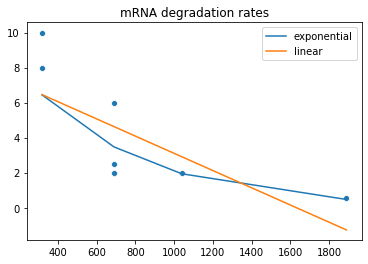

In [0]:
x = df_halflife.iloc[:8]["Length"].to_numpy()
y = df_halflife.iloc[:8]["Half-life (minutes)"].to_numpy()
ax = sns.scatterplot(x=x,y=y)
plt.title('mRNA degradation rates')

# fit
y_exp = np.polyfit(x,np.log(y),1)
plt.plot(x, np.exp(y_exp[1])*np.exp(y_exp[0]*x))

# y_log = np.polyfit(np.log(x),y,1)
# plt.plot(y_log[0]*x+y_log[1])

y_lin = np.polyfit(x,y,1)
plt.plot(x,y_lin[0]*x+y_lin[1])

ax.legend(["exponential", "linear"])

## degradation rates

In [0]:
# read in the degradation table
df_degrad = pd.read_table(projdir+"mrna_degrad2.txt")
df_degrad["Length"] = pd.Series()
pcodedlist = df_degrad["Proteins Coded"].str.split(" ")
for i in range(df_degrad.shape[0]):
  l = pcodedlist[i]
  out = sum([int(df_txlen.loc[x,"length"]) for x in l])
  df_degrad.iloc[i, 3] = out
df_degrad

,mRNA Name,Proteins Coded,Rate,Length
0,A,P2 P5 P7 P9 P8,0.020387,1889.0
1,B,P10 P5 P7 P9 P8,0.005776,1039.0
2,D,P5 P7 P9 P8,0.005776,689.0
3,E,P5 P7 P9 P8,0.004621,689.0
4,F,P5 P7 P9 P8,0.001925,689.0
5,G,P9 P8,0.001444,318.0
6,H,P9 P8,0.001155,318.0
7,Z,P3 P6,0.001925,1640.0
8,Y,P3 P6 P1 P11,0.001925,2990.0
9,W,P4,0.001925,1270.0


[ 1.70684029e-03 -6.96366259e+00]


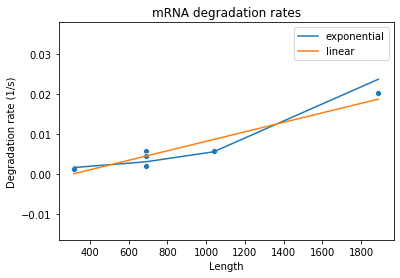

In [0]:
x = df_degrad.iloc[:7]["Length"].to_numpy()
y = df_degrad.iloc[:7]["Rate"].to_numpy()
ax = sns.scatterplot(x=x,y=y)

ax.set(xlabel='Length', ylabel='Degradation rate (1/s)')
plt.title('mRNA degradation rates')

# fit
y_exp = np.polyfit(x,np.log(y),1)
print(y_exp)
plt.plot(x, np.exp(y_exp[1])*np.exp(y_exp[0]*x))

# y_log = np.polyfit(np.log(x),y,1)
# plt.plot(y_log[0]*x+y_log[1])

y_lin = np.polyfit(x,y,1)
plt.plot(x,y_lin[0]*x+y_lin[1])

ax.legend(["exponential", "linear"])